In [7]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header = None, index_col = None)
df

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
df = df[[2,3]].reset_index(drop = True)

In [12]:
df

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:
df.columns = ['sentiment','text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


feature engineering

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [15]:
df.sample(10)

,sentiment,text
21680,Positive,Go all day.
22131,Positive,C9 CSGO is back and it seems good to get excit...
50676,Positive,Great effort from Finlay Lyttle and Aaron Edwa...
72596,Positive,I never miss Nvidia events. I've even been to ...
13803,Negative,THESE... TOUGH!!!!!.
56974,Positive,This was much fun to make!
49495,Negative,"""I remember being hacked by FIFA headquarters...."
37490,Neutral,Thanks @ Ridiculously for BIG ID... Thanks to ...
50425,Negative,Just downloaded FIFA 20 and thankfully this ga...
40486,Irrelevant,Check out my broadcast feed from my PlayStatio...


In [16]:
df.isnull().sum()
df.dropna(inplace = True)

In [17]:
sum(df['text'].apply(len)>5),sum(df['text'].apply(len)<=5)

(72883, 2113)

In [18]:
print(df.shape)
df = df[df['text'].apply(len)>5]


(74996, 2)


In [19]:
print(df.shape)

(72883, 2)


In [20]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

# Preprocessing preprocess_kgptalkie

In [21]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall


  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /private/var/folders/46/rlqf2svn53d70q1l65sdh8rm0000gq/T/pip-req-build-hofgc3ag
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /private/var/folders/46/rlqf2svn53d70q1l65sdh8rm0000gq/T/pip-req-build-hofgc3ag
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=19b4001b3bdf6b62e21243630bfb42cb34fd568bca654097b9bfbeef798b81d8
  Stored in directory: /private/var/folders/46/rlqf2svn53d70q1l65sdh8rm0000gq/T/pip-ephem-wheel-cache-nh1pek_p/wheels/74/fe/05/0d013c54ae5e4afb77c6c480378063827c84f57ea5f554e072
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    

In [22]:
import preprocess_kgptalkie as ps
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


df.columns

In [23]:
df = ps.get_basic_features(df)

In [24]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


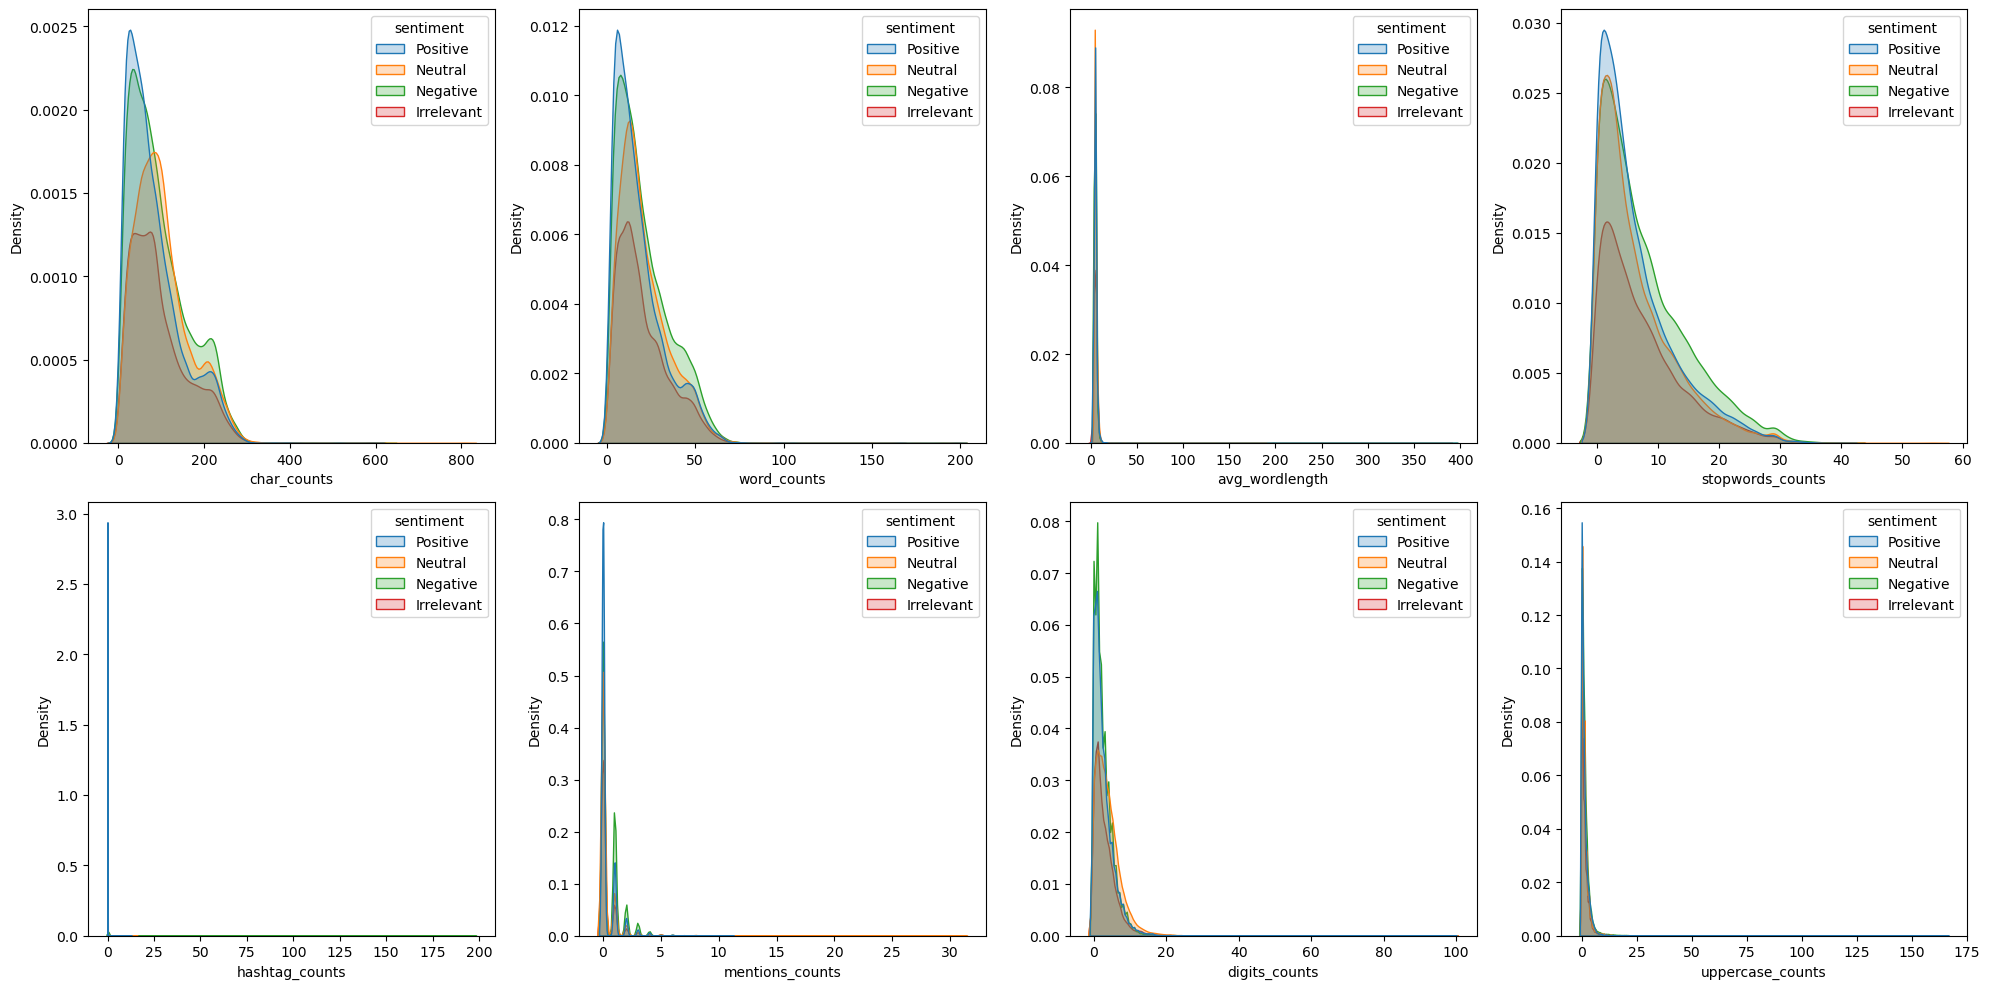

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
num_cols = df.select_dtypes(include = 'number').columns

for col in num_cols:
    plt.subplot(2,4,num_cols.get_loc(col)+1)
    sns.kdeplot(data = df, x = col, hue = 'sentiment', fill = True)

    
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

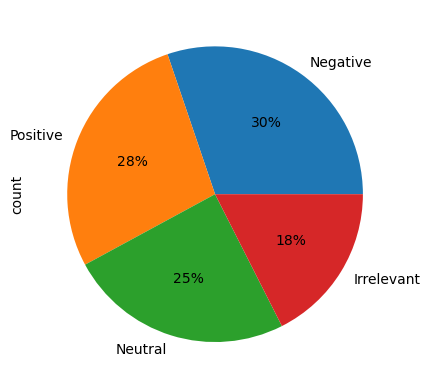

In [61]:
df['sentiment'].value_counts().plot(kind = 'pie', autopct = "%1.0f%%")

# visualization

In [62]:
##word cloud visualization
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 720.7 kB/s eta 0:00:00a 0:00:01


In [63]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [64]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

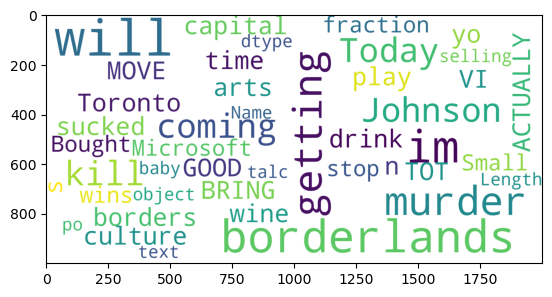

In [65]:
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 300, max_font_size= 40, scale = 5).generate(str(df['text']))


plt.imshow(wordcloud)

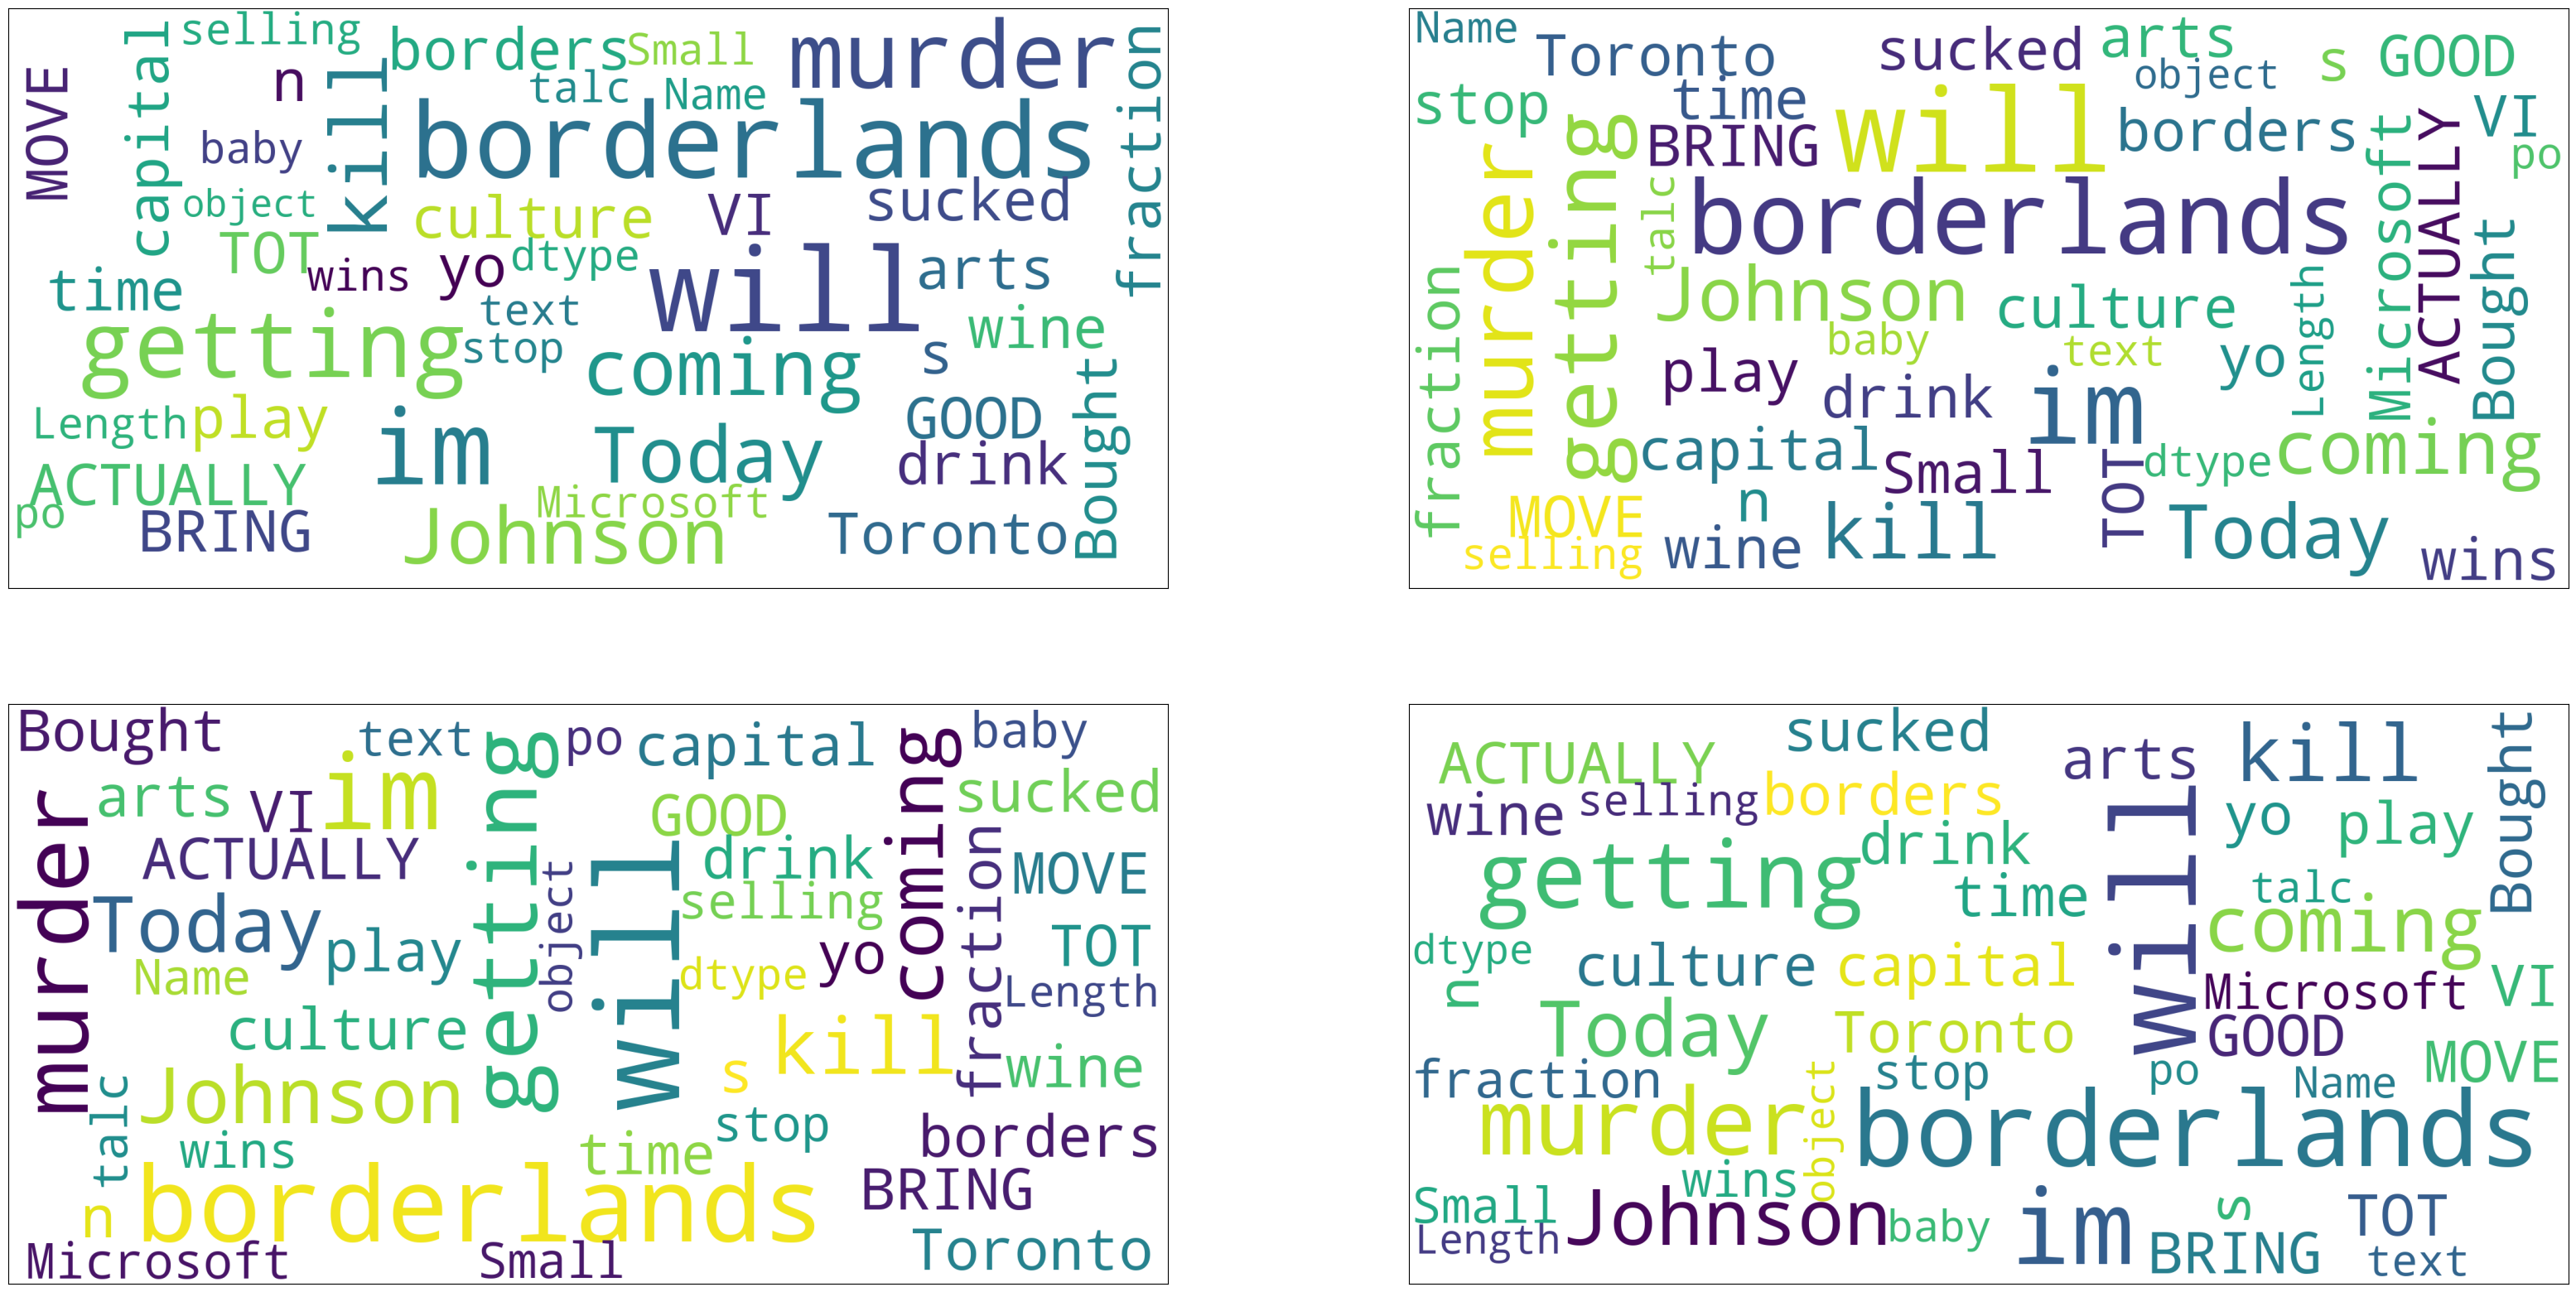

In [70]:
plt.figure(figsize = (40,20))

for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2,index+1)
    
    data= df[df['sentiment']==sent]['text']
    wordcloud = WordCloud(background_color = 'white', stopwords = stopwords,max_words = 300, max_font_size = 40, scale = 5).generate(str(df['text']))
    
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])

# data cleaning

In [77]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))

In [79]:
#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['sentiment'], test_size = 0.2, random_state = 0)

In [80]:
X_train.shape, X_test.shape

((58306,), (14577,))

# model building and testing

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

 

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [172]:
clf = Pipeline([('tfid',TfidfVectorizer()),('rfc',RandomForestClassifier(n_jobs = -1))])
    
clf.fit(X_train, Y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [173]:
from sklearn.metrics import classification_report

In [174]:
y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.85      0.91      2561
    Negative       0.92      0.96      0.94      4481
     Neutral       0.92      0.92      0.92      3553
    Positive       0.91      0.94      0.92      3982

    accuracy                           0.92     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.92      0.92     14577



In [175]:
import pickle

# Save the model to a file
pickle.dump(clf, open("twitter_sentiment_analysis.pkl", 'wb'))
#     pickle.dump(clf, file)


In [176]:
clf.predict(['let me not upset you'])

array(['Negative'], dtype=object)

In [177]:
clf.predict(['let me upset you'])

array(['Negative'], dtype=object)

In [178]:
clf.predict(['let me you'])

array(['Negative'], dtype=object)

In [179]:
clf.predict(['i am not happy'])

array(['Negative'], dtype=object)

In [180]:
clf.predict(['glad to see you'])

array(['Positive'], dtype=object)

In [181]:
clf.predict(['i am shivani'])

array(['Negative'], dtype=object)

In [182]:
clf.predict(['aadil'])

array(['Negative'], dtype=object)

In [183]:
clf.predict(['how the hell are we into halloween month already'])

array(['Irrelevant'], dtype=object)

In [184]:
clf.predict(['i have done nothing but play borderland '])

array(['Negative'], dtype=object)

In [185]:
clf.predict(['i have done  but play borderland'])

array(['Positive'], dtype=object)